### Import libraries

In [11]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
source("helperFunctions.R")
source("visualizeGMMLibrary.R")

### Set the sample

In [12]:
sample_list <- c("hT1", "hT25","hT70", "hT72") # Set the sample that you want to view the GMM for here.

### Display GMM for mclust model E, minjoin = 0.25, mintrial = 10

We are using the default GMM parameters: mclust model E, minjoin 0.25, ntrial 10, etc.

The GMM model performs well. Only issue is the potentially misclassification of the segments at logR = ~2. Potentially by increasing minjoin or using the mclust V model, we can fix this.

[1] "Display seginput histogram for tumor=hT1 which contains the segment_count=75"
[1] "Display seginput histogram for tumor=hT25 which contains the segment_count=82"


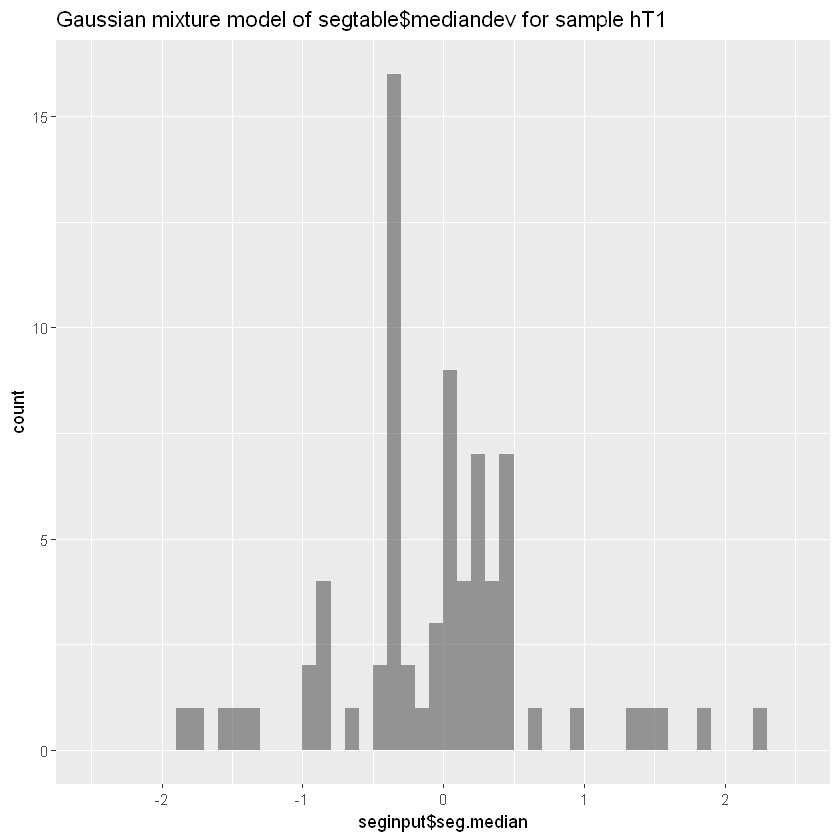

[1] "Display seginput histogram for tumor=hT70 which contains the segment_count=43"


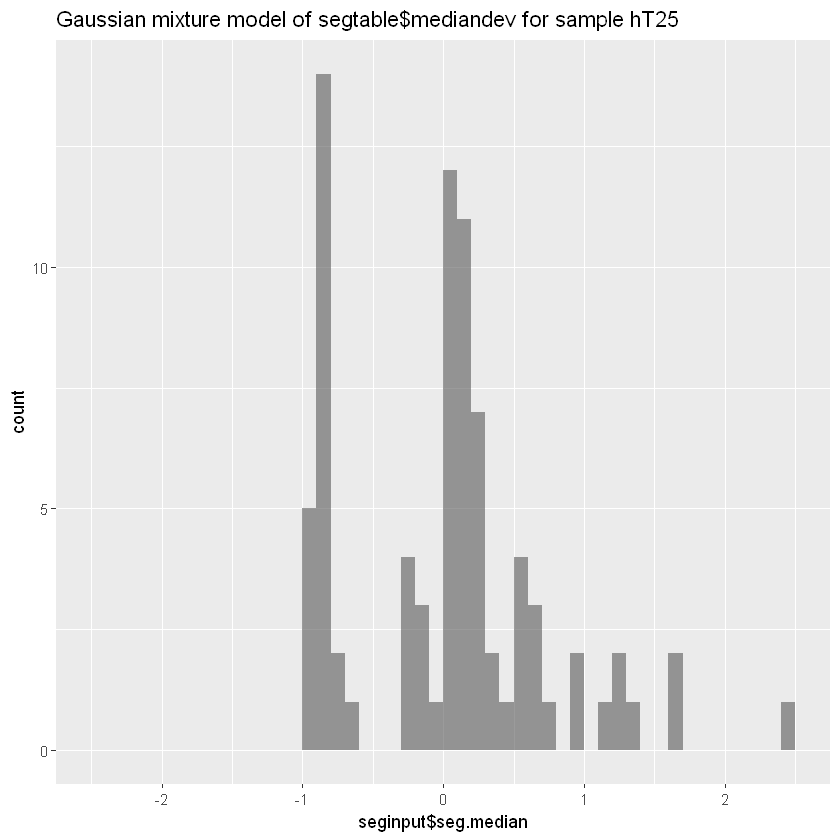

[1] "Display seginput histogram for tumor=hT72 which contains the segment_count=45"


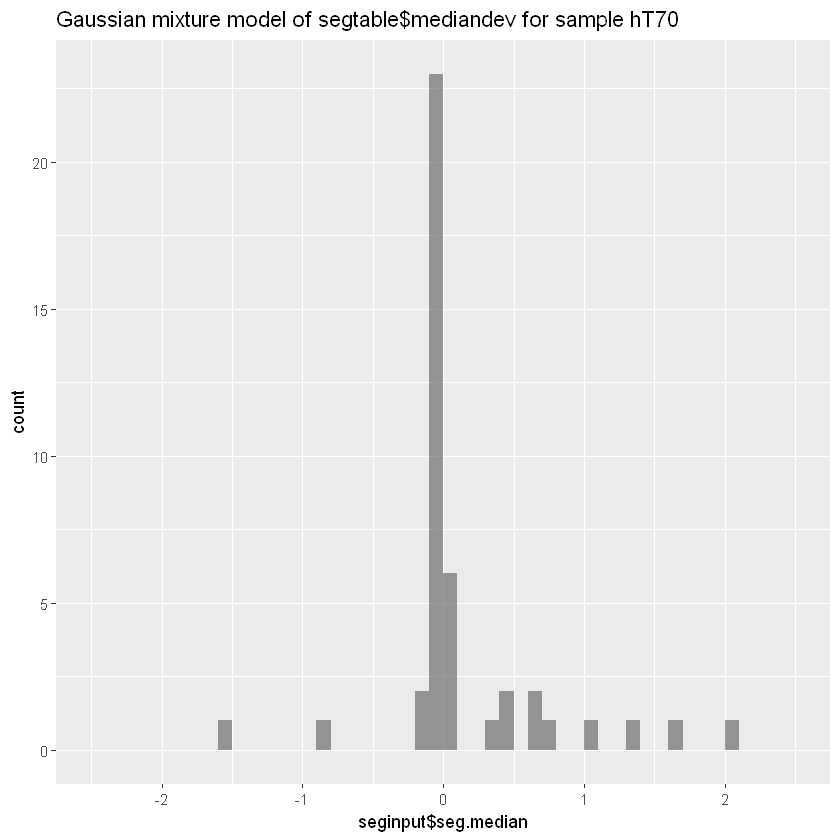

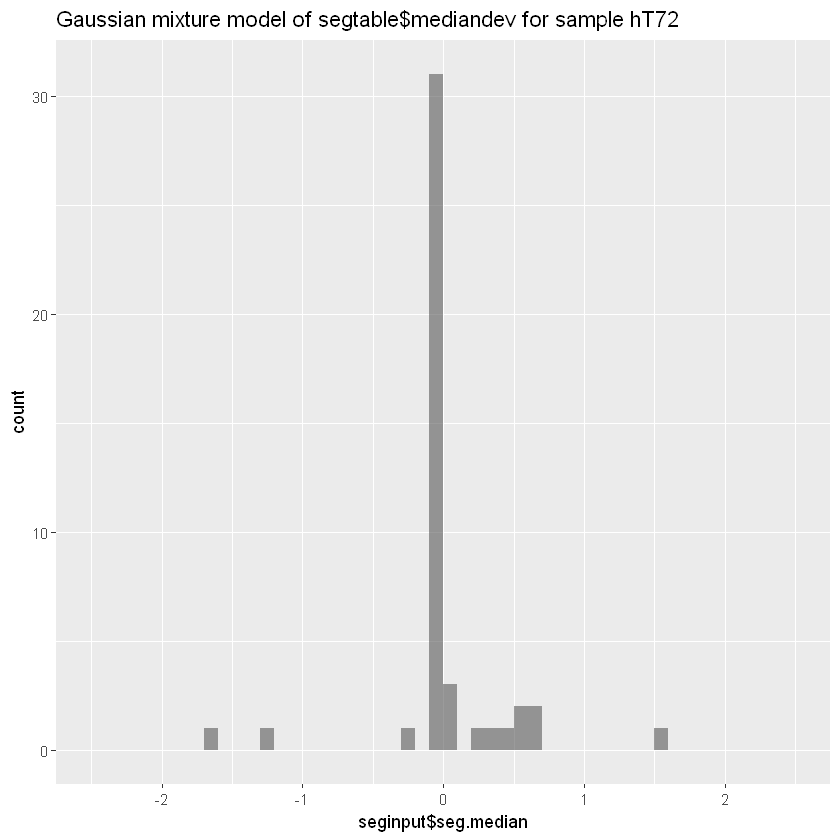

In [14]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    seginput <- retrieveSeginput(sample, dir = "segInputs/")
    displaySeginputHistogram(seginput = seginput, sample = sample, print = TRUE, save = FALSE)
}

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

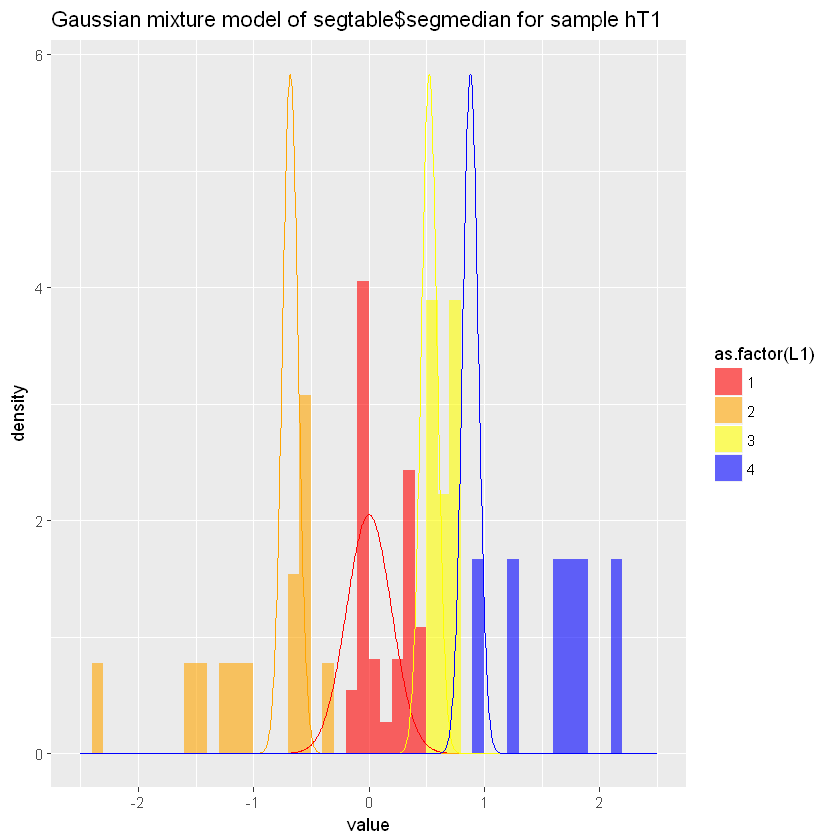

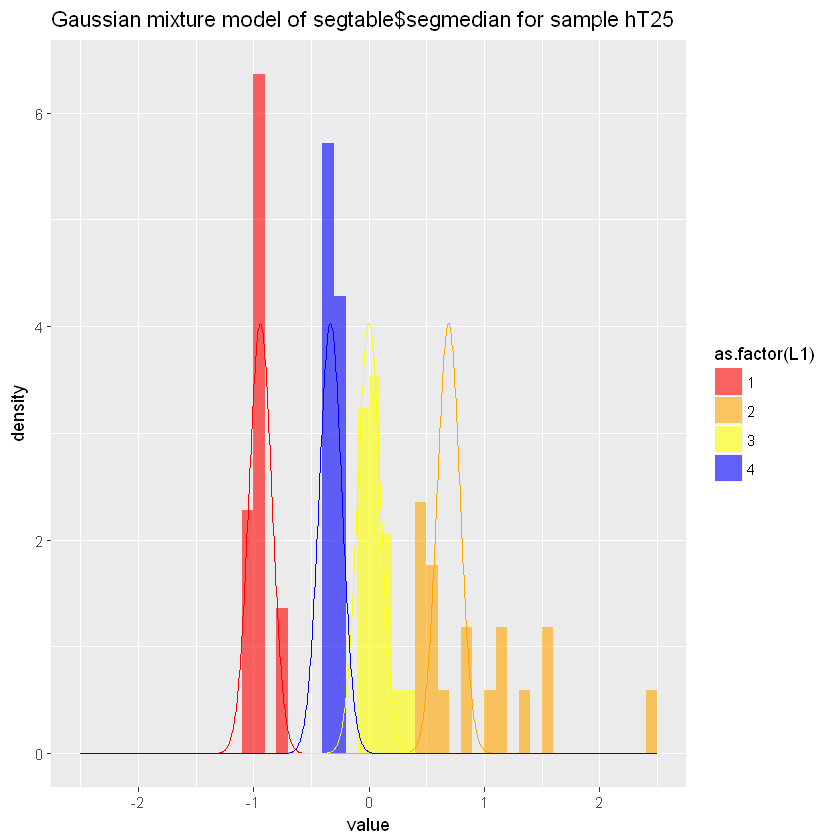

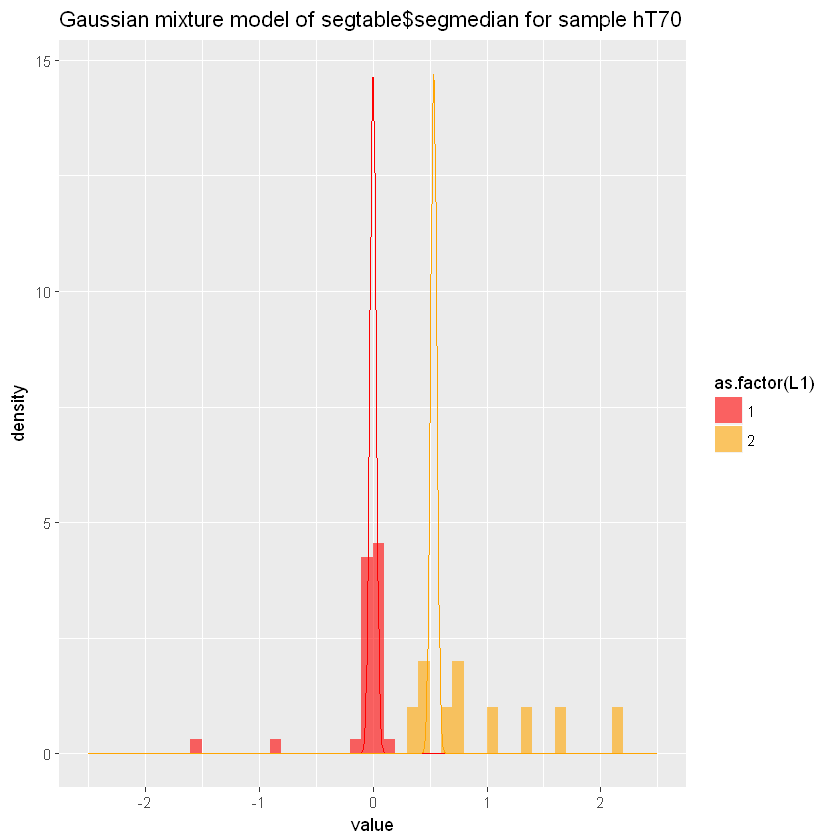

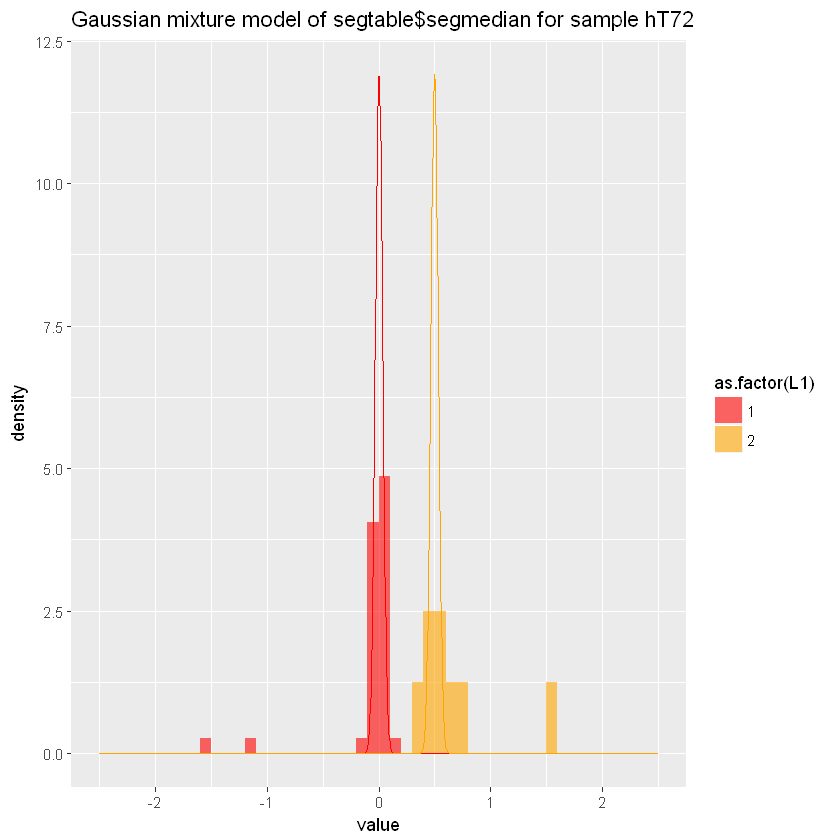

In [14]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_E <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run1/")
    displayGMM(segtable = segtable_mclust_E, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model V, minjoin = 0.25

Here, we are running the GMM model using the mclust model "V", which is fitting Gaussian components without any restriction of equal mean or (especially) variance. In the plot below, we can see obvious errors in the clustering where clear overlapping is occuring between cluster components, which is rational that this behaviour should not occur within the context of segments.

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

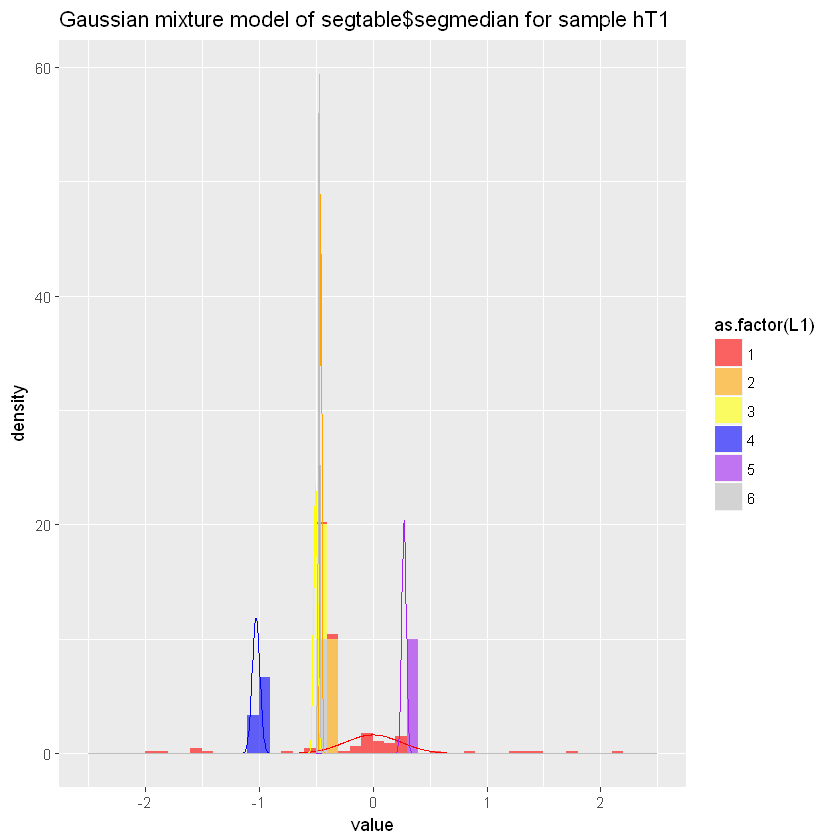

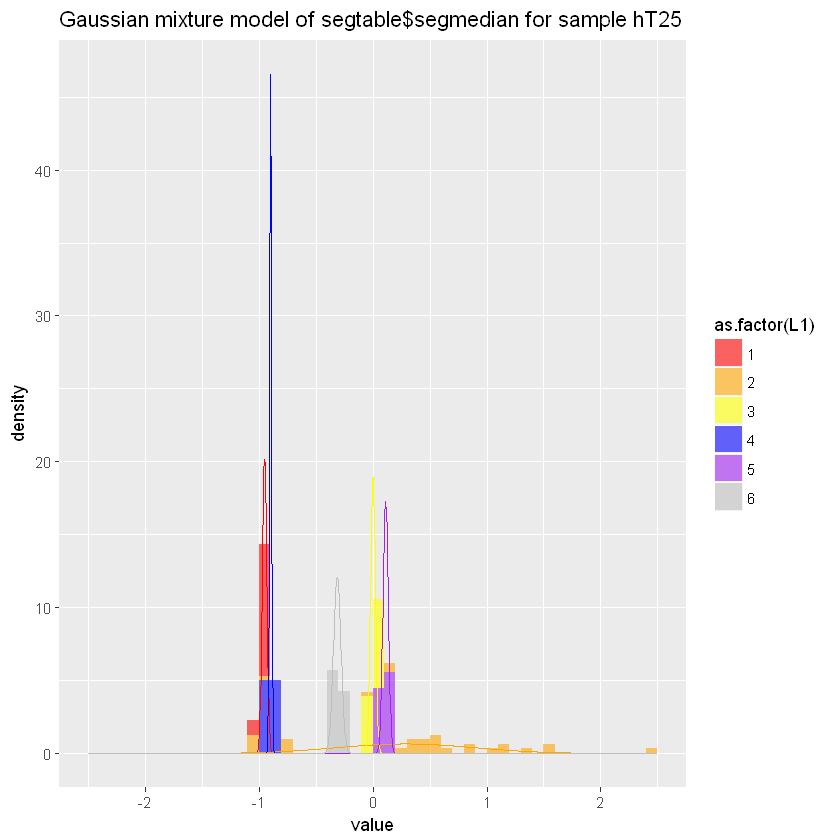

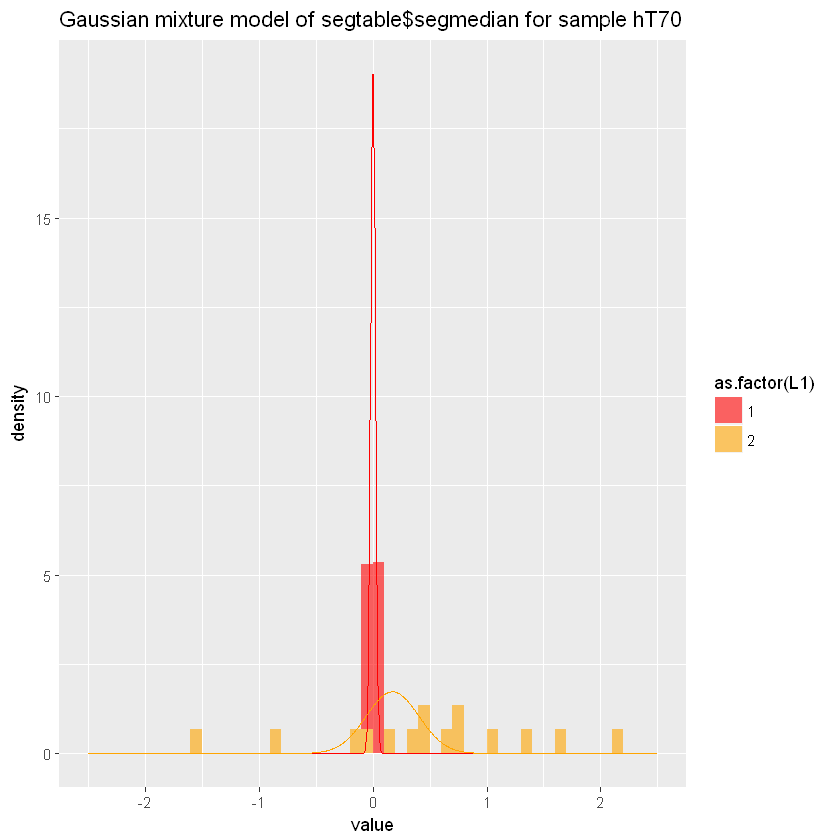

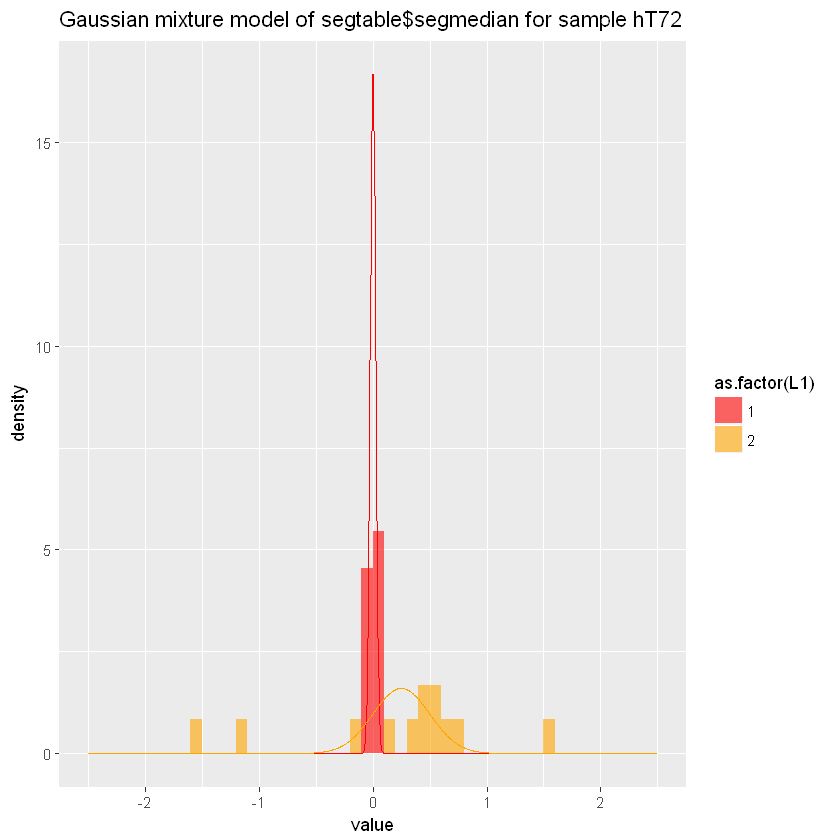

In [15]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_V <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run3/")
    displayGMM(segtable = segtable_mclust_V, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 0.50, ntrial = 40

Here, we are running the GMM model using the mclust model "E", which is fitting Gaussian components with equal variance. We also using a high minjoin of 0.50 (meaning that half of cluster must be shared to join). Hypothetically, we were hoping to see more clusters. However, the results are identical to using minjoin = 0.25. We will try and prevent cluster joining altogether by making minjoin = 1.0

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

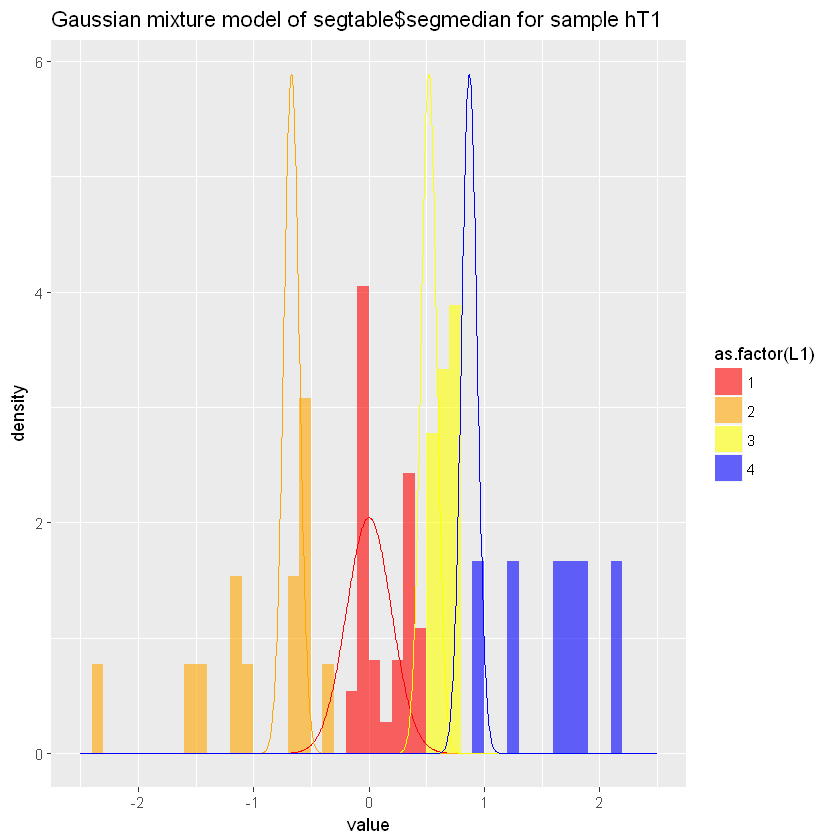

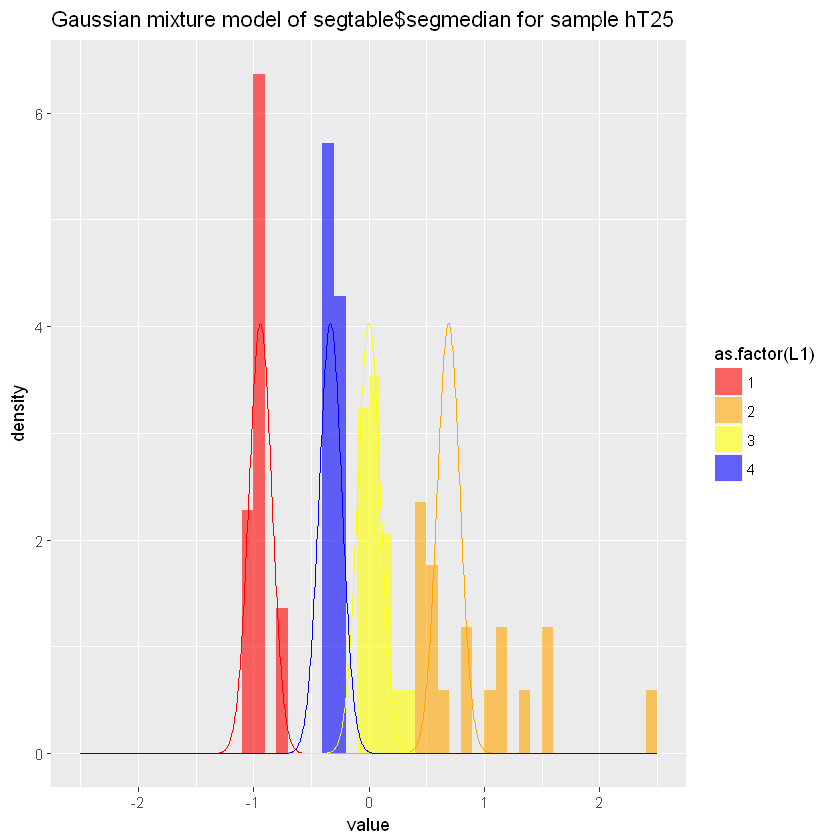

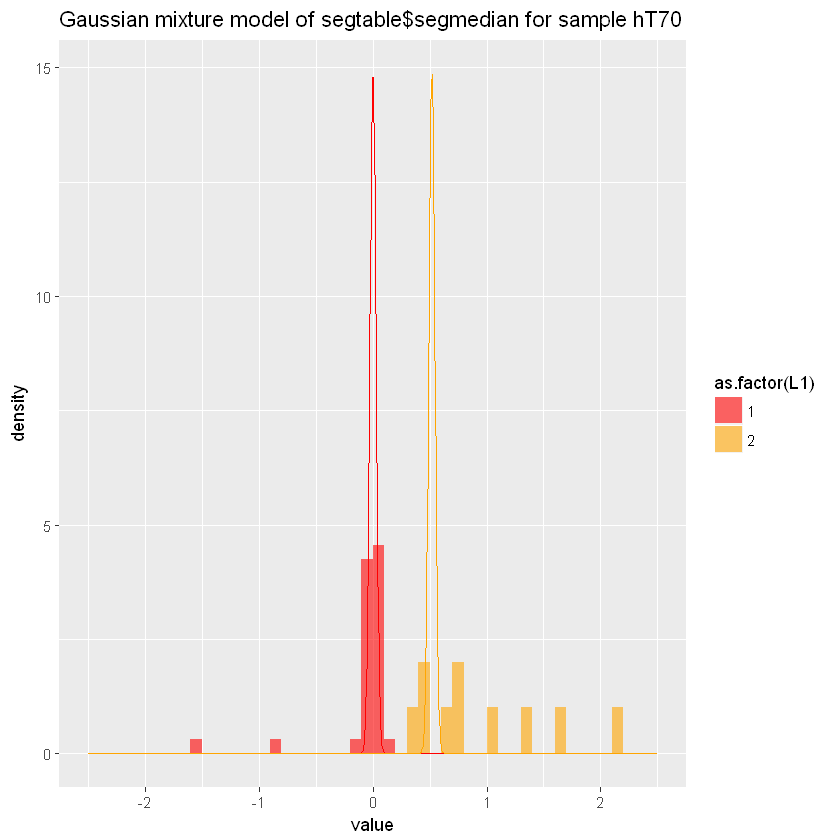

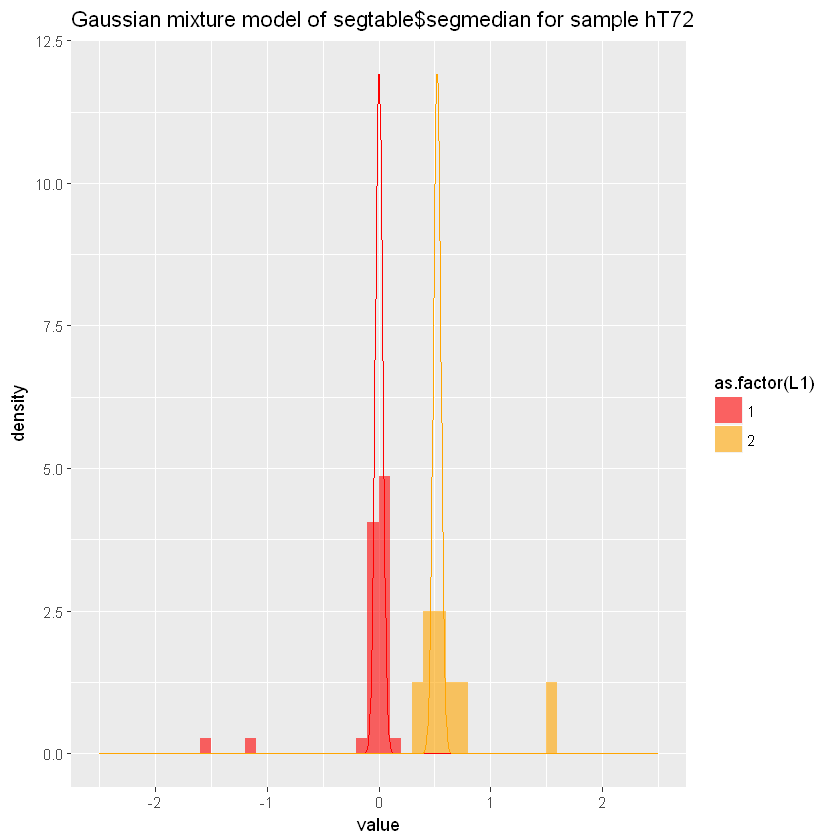

In [16]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_V <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_19_2018_1/")
    displayGMM(segtable = segtable_mclust_V, sample = sample, print = TRUE, save = FALSE)
}

### Display GMM for mclust model E, minjoin = 1.00, ntrial = 10

Here, we are running the GMM model using the mclust model "E", which is fitting Gaussian components with equal variance. We also using a high minjoin of 1.00 to avoid joining clusters. The GMM is very similar to smaller minjoin runs, although there are instances of extra components. The component added seems reasonable to include.

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

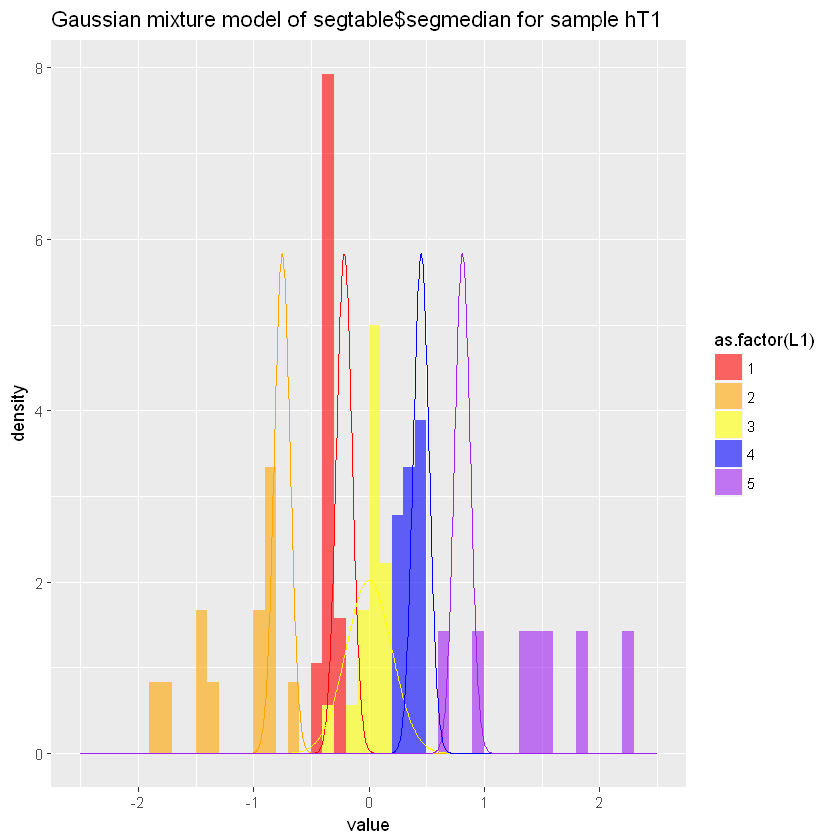

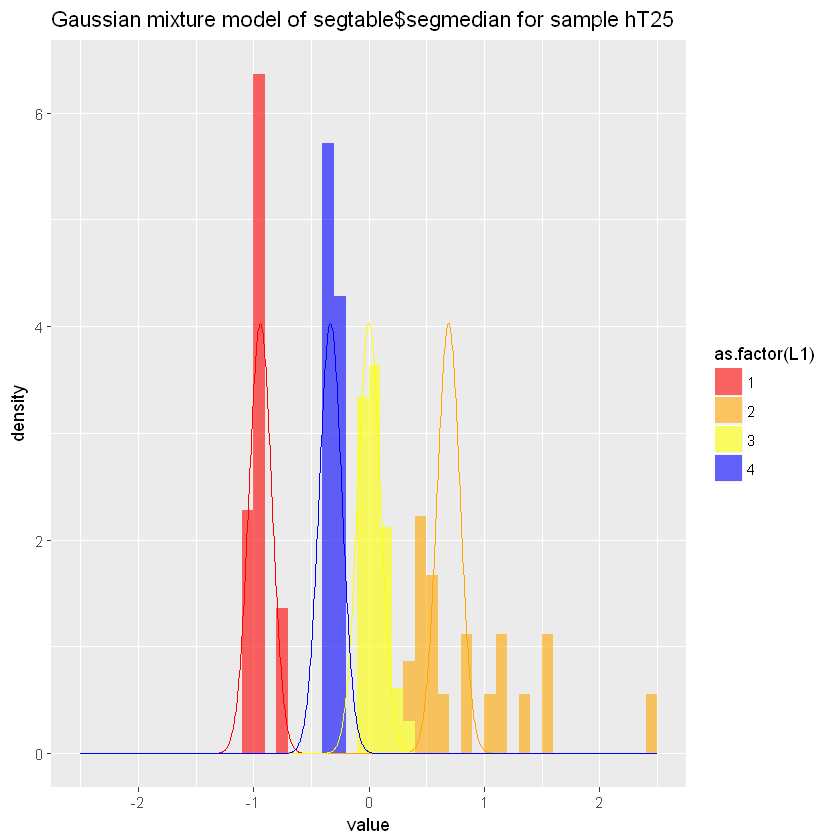

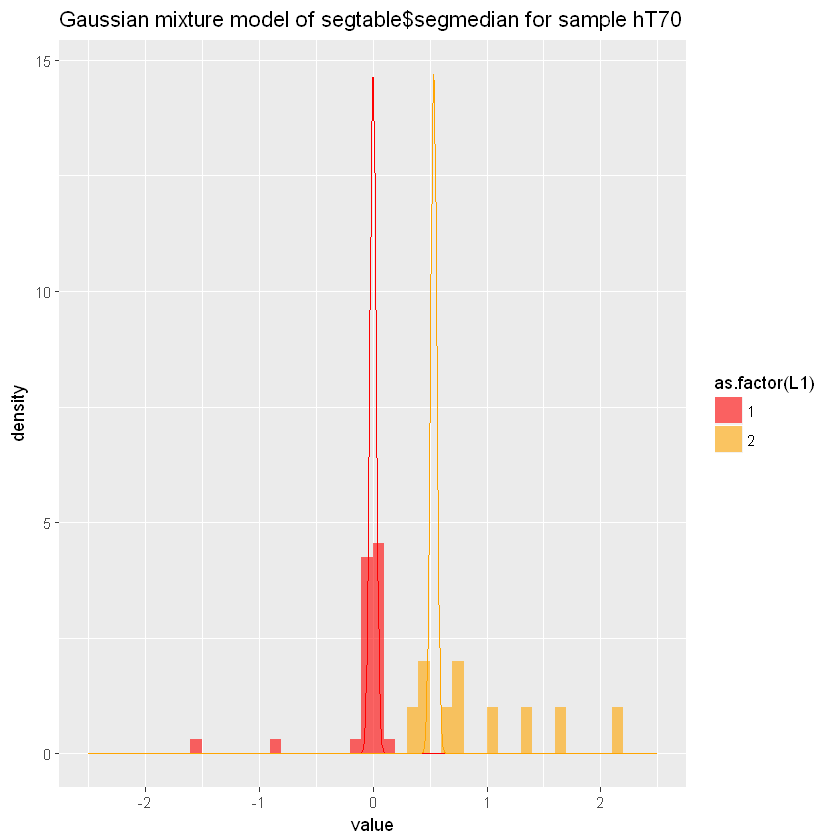

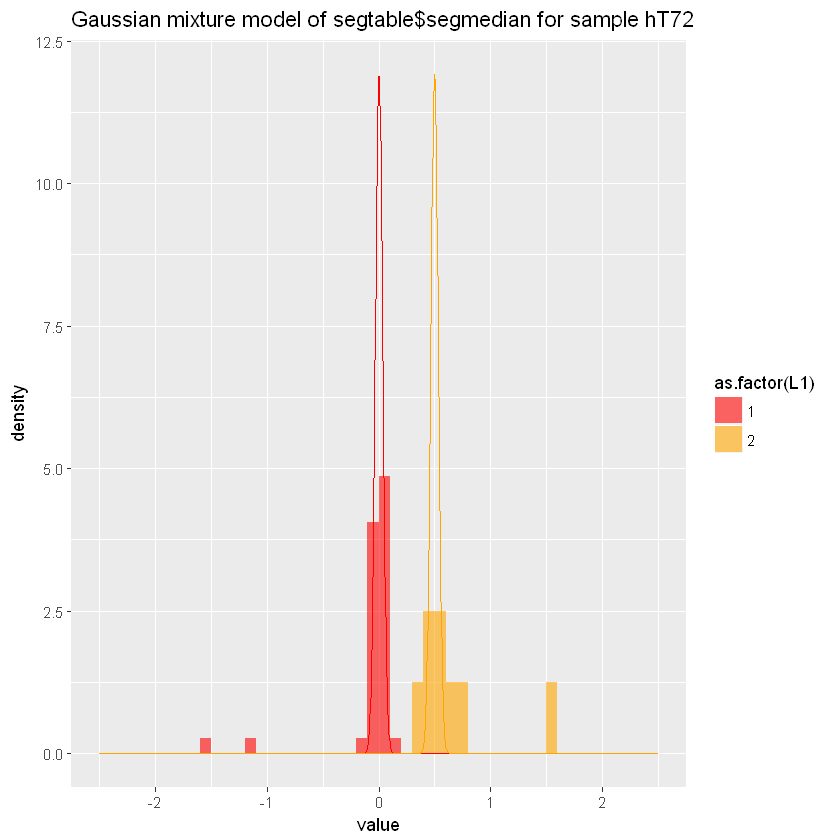

In [19]:
for(sample in sample_list){
    setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
    segtable_mclust_V <- retrieveSegtable(sample, dir = "segClusteringResults/prev_run_7_19_2018_2/")
    displayGMM(segtable = segtable_mclust_V, sample = sample, print = TRUE, save = FALSE)
}

In [19]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
segtable_mclust_V <- retrieveSegtable("hT1", dir = "segClusteringResults/prev_run_7_19_2018_2/")
nrow(segtable_mclust_V)
head(segtable_mclust_V)

[1] 75

ID,start,end,num.probes,seg.median,chrom,chrom.pos.start,chrom.pos.end,cytoband.start,cytoband.end,...,segmad,mediandev,segerr,centerz,marginalprob,maxz,maxzmean,maxzsigma,samplesize,negtail
hT1,1,224,224,-0.26888411,1,15000,1624200,p36.33,p36.33,...,0.4378909,-0.26409939,0.035894234,0.471327969,0.0913773384,0.5286720,-0.2145776,0.06842795,19003,6.013728e-03
hT1,225,233,9,-1.43345161,1,1635450,1670550,p36.33,p36.33,...,0.2416080,-1.42866689,0.302070997,0.000000000,0.0000000000,1.0000000,-0.7521977,0.06842795,871214,5.994736e-05
hT1,234,4077,3844,-0.30565246,1,1685616,148342050,p36.33,q21.2,...,0.4029146,-0.30086773,0.008140410,0.471164453,0.1607487725,0.5288355,-0.2145776,0.06842795,208,3.919119e-03
hT1,4078,4329,252,0.02291525,1,148644408,152058600,q21.2,q21.3,...,0.4070114,0.02769998,0.036300805,0.999785862,0.1712919606,0.9997859,0.0000000,0.19707249,8956,8.385833e-01
hT1,4330,4476,147,0.28264112,1,152058907,152815998,q21.3,q21.3,...,0.2885977,0.28742585,0.028375777,0.004384489,0.0001736683,0.9956139,0.4521020,0.06842795,40392,9.926230e-01
hT1,4477,7295,2819,0.05201515,1,152857102,249211903,q21.3,q44,...,0.3787611,0.05679988,0.008737388,0.999844939,0.2597562152,0.9998449,0.0000000,0.19707249,317,8.789482e-01


In [20]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
seginput <- retrieveSeginput("hT1", dir = "segInputs/")
nrow(seginput)
head(seginput)

[1] 75

ID,start,end,num.probes,seg.median,chrom,chrom.pos.start,chrom.pos.end,cytoband.start,cytoband.end,abs.pos.start,abs.pos.end
hT1,1,224,224,-0.26888411,1,15000,1624200,p36.33,p36.33,15000,1624200
hT1,225,233,9,-1.43345161,1,1635450,1670550,p36.33,p36.33,1635450,1670550
hT1,234,4077,3844,-0.30565246,1,1685616,148342050,p36.33,q21.2,1685616,148342050
hT1,4078,4329,252,0.02291525,1,148644408,152058600,q21.2,q21.3,148644408,152058600
hT1,4330,4476,147,0.28264112,1,152058907,152815998,q21.3,q21.3,152058907,152815998
hT1,4477,7295,2819,0.05201515,1,152857102,249211903,q21.3,q44,152857102,249211903


starting httpd help server ... done
